In [1]:
'''
Exploratory Data Analysis with:

                pandas 
                matplotlib (scatter and bar plot)
                seaborn (heatmaps) 

'''

# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# marketing data to analyze
df = pd.read_csv('marketing_analysis.csv',skiprows=2)

In [2]:
# rows and columns
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
# jobedu has two specific data values in the column
df.jobedu
# get job data from jobedu column in its own column 
df['job'] = df.jobedu.apply(lambda x: x.split(",")[0])
# get education data from jobedu column in its own column 
df['education'] = df.jobedu.apply(lambda x: x.split(",")[1])
# since we have the data drop the column
df = df.drop('jobedu',axis = 1)

In [4]:
# customer id is a repeat of index
df.drop('customerid',axis = 1, inplace=True)

In [5]:
'''
Check which columns have NaN values
Check data type of column
Dropping NaN values from dataset and replace depending on data type
Numerical data type replace with mean
Object data type replaced with mode
Verify data is filled
'''
# remove null values 
df.isnull().sum()
# Removing Null Values
# age nulls with mean because numerics type of data
type(df.age[0])
mean = df.age.mean()
# fill the NaN data with average from column
df.age = df.age.fillna(mean)
# verifying data is filled
df.age.isnull().sum()
# converting string to datetime values using pandas
#    mode of month to fill NaN values because it is a pandas object data type
type(df.month[0])
df.month = pd.to_datetime(df.month)
# find mode of column
month_mode = df.month.mode()[0]
# fill NaN values with mode of column 
df.month = df.month.fillna(month_mode)
# verify data is filled
df.month.isnull().sum()
# visualizing object data type to see the occurence of each object to know what to fill
type(df.response[0])
df.response.value_counts(normalize=True)
# object data types are fill with mode of data except when target value, drop them 
response_mode = df.response.mode()[0]
# fill data with mode 
df = df.dropna(axis='index')
# verify data is filled
df.isnull().sum()

0

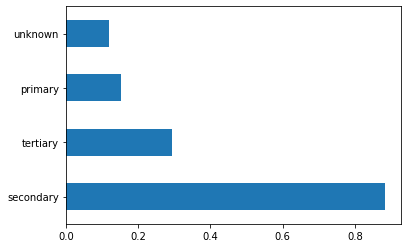

In [6]:
'''
Plot the data to for Data Analysis after removing NaN values
Depending on data type of column the data will be analyzed a certain way
Object data type will be viewed by value counts (how many type each category appears in column)
Numerical data type will be viewed based on statistics of data (using .describe() in column from pandas)
'''

# month column is categorical so we use value counts to analyze this data 
df.month.value_counts(normalize=True)
# plot the value counts of the analyzed data on a bar graph
df.month.value_counts(normalize=True).plot.barh()

# response column is categorical so we use value counts to analyze this data
df.response.value_counts(normalize=True)
# plot the value counts of this data into a bar graph since it is categorical
df.response.value_counts(normalize=True).plot.barh()

# education is a categorical variable so we use the value counts of this variable to analyze it
df.education.value_counts(normalize=True)
# plot the results of the value counts 
# educational data in this column is also a time series data (in order of primary, tertiary, and secondary)
df.education.value_counts(normalize=True).plot.barh()

In [7]:
'''
Looking for outliers:

Comparing Numeric data types:
    
    Two Numeric data types:
        - Scatter Plot
        - Pair Plot
        - Correlation Matrix
    
    Three numeric data types:
        - Pair Plot
        - Correlation Matrix
    
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
    
Using matplotlib for scatter function on plt object
Using a scatter plot for COMPARING NUMERICAL data to analyze 
    Sometimes Univariate analysis is not significant (will not show outliers)
    This is where Multivariate analysis comes in (more than one variable)
'''


'\nLooking for outliers:\n\nComparing Numeric data types:\n    \n    Two Numeric data types:\n        - Scatter Plot\n        - Pair Plot\n        - Correlation Matrix\n    \n    Three numeric data types:\n        - Pair Plot\n        - Correlation Matrix\n    \nComparing Numeric-Categorical data types:\n    \n    One Numerical, One Categorical\n        - Mean\n        - Median\n        - Box Plots\n    \nUsing matplotlib for scatter function on plt object\nUsing a scatter plot for COMPARING NUMERICAL data to analyze \n    Sometimes Univariate analysis is not significant (will not show outliers)\n    This is where Multivariate analysis comes in (more than one variable)\n'

In [8]:
'''
Checking data types for analysis strategies
'''

type(df.salary[0])

numpy.int64

In [9]:
'''
Checking data types for analysis strategies
'''

type(df.balance[0])

numpy.int64

In [10]:
'''
Checking data types for analysis strategies
'''

type(df.age[0])

numpy.float64

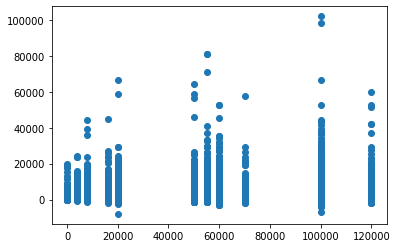

In [11]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''


'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.salary,df.balance)


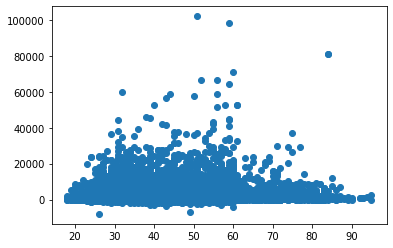

In [12]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.age,df.balance)

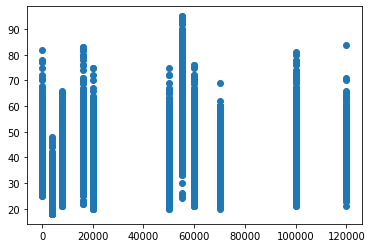

In [14]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.salary,df.age)

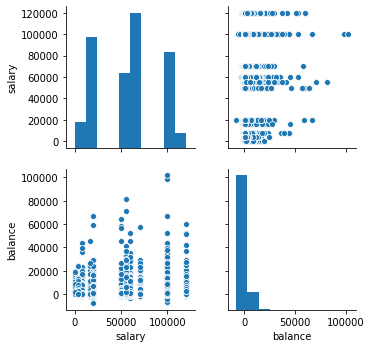

In [15]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

sns.pairplot(data = df, vars=['salary','balance'])

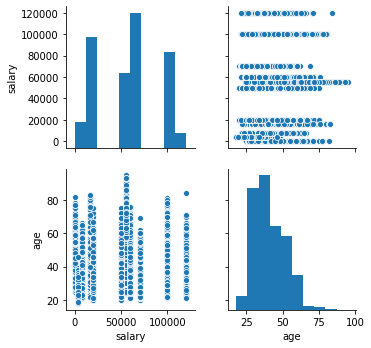

In [16]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

sns.pairplot(data = df, vars=['salary','age'])

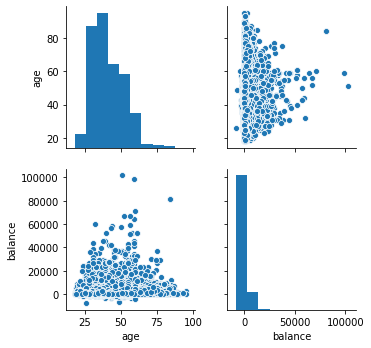

In [17]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''


'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

sns.pairplot(data = df, vars=['age','balance'])

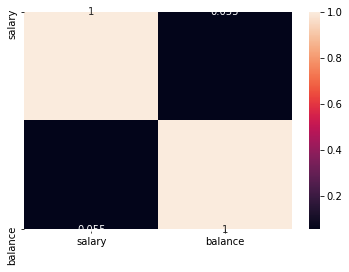

In [18]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''

sns.heatmap(df[['salary','balance']].corr(),annot=True)

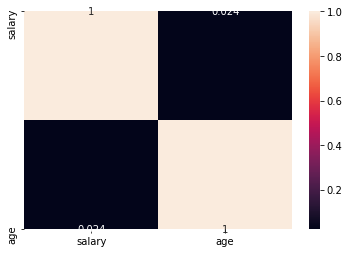

In [19]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''

sns.heatmap(df[['salary','age']].corr(),annot=True)

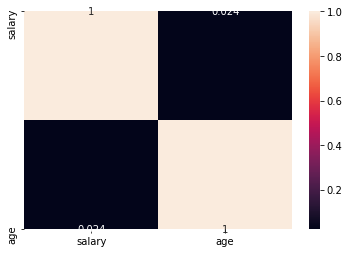

In [20]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''

sns.heatmap(df[['salary','age']].corr(),annot=True)

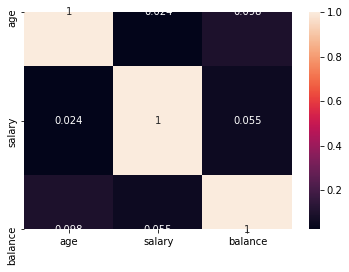

In [21]:
'''
Three numeric features:
    
    Using correlation matrix (for numeric data type)

        - pandas.corr() method
        - seaborn .heatmap() method
        
    Using mean
        - pandas .groupby()[].mean()
    Using median
        - pandas .groupby()[].median()
'''



sns.heatmap(df[['age','salary','balance']].corr(),annot=True)


In [22]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using mean to compare Categorical and Numerical data type
'''

df.groupby('response')['salary'].mean()

response
no     56772.367498
yes    58771.704180
Name: salary, dtype: float64

In [23]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using median to compare Categorical and Numerical data type
'''
df.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

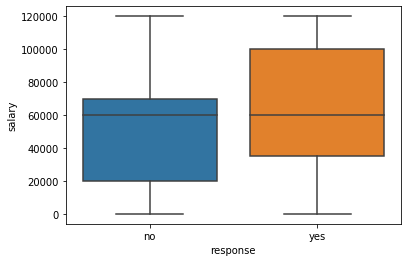

In [24]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using boxplots to compare Categorical and Numerical data type
'''
sns.boxplot(df.response,df.salary)

In [33]:
# changing object data to numerical for analsis
df['response'] = np.where(df.response == "yes",1,0)

In [27]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using mean to compare Categorical and Numerical data type
'''

df.groupby('marital')['response'].mean()

marital
divorced    0.119455
married     0.101198
single      0.149414
Name: response, dtype: float64

In [28]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using median to compare Categorical and Numerical data type
'''
df.groupby('marital')['response'].median()

marital
divorced    0
married     0
single      0
Name: response, dtype: int64

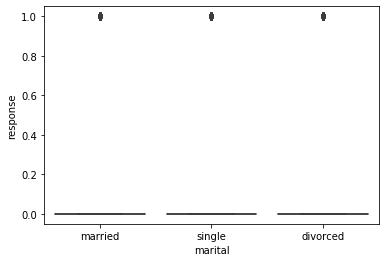

In [29]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using boxplots to compare Categorical and Numerical data type
'''
sns.boxplot(df.marital,df.response)

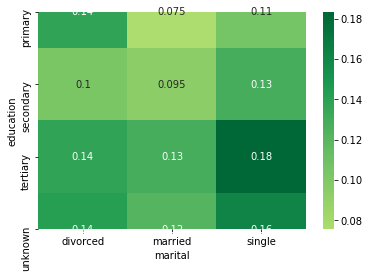

In [30]:
'''
Three variables in comparison

    Using correlation matrix (for numeric data type)

        - pandas.corr() method
        - seaborn .heatmap() method
'''

result = pd.pivot_table(data=df,index = 'education',columns = 'marital',values = 'response')
sns.heatmap(result,annot=True,cmap='RdYlGn',center=.0117)